<a href="https://colab.research.google.com/github/itsmesethus/demo_test/blob/main/kkkk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import os
import pandas as pd
import cv2
import imghdr
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
# to show the img classes present in our  dataset.
dir='/content/drive/MyDrive/aaaaadata/bajwa hospital Eye_diseases_dataset'
for image_class in os.listdir(dir):
   print(image_class)


normal
cataract
glaucoma
retina_disease


(1632, 2464, 3)


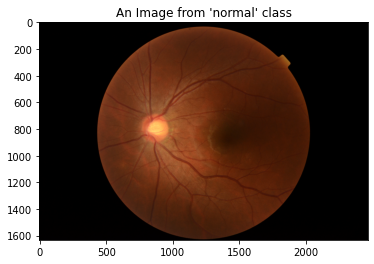

In [ ]:
normal_img=cv2.imread(os.path.join(dir,'normal','NL_001.png'))
print(normal_img.shape)

#opencv reads the image BGR order
#inorder to convert it into RGB  we have used the method of 'cvtColor'
plt.title("An Image from 'normal' class")
plt.imshow(cv2.cvtColor(normal_img,cv2.COLOR_BGR2RGB))


(1728, 2592, 3)


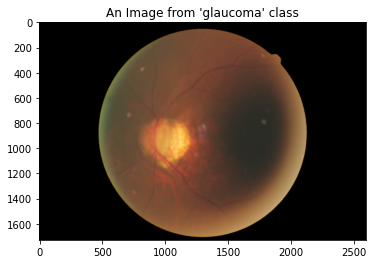

In [ ]:
glaucoma_img=cv2.imread(os.path.join(dir,'glaucoma','Glaucoma_004.png'))
print(glaucoma_img.shape)
plt.title("An Image from 'glaucoma' class")
plt.imshow(cv2.cvtColor(glaucoma_img,cv2.COLOR_BGR2RGB))


(1632, 2464, 3)


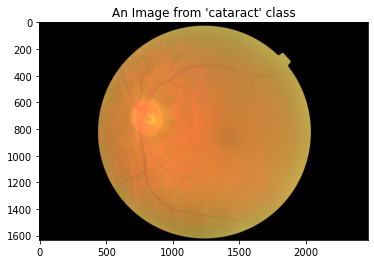

In [ ]:
cataract_img=cv2.imread(os.path.join(dir,'cataract','cataract_025.png'))
print(cataract_img.shape)
plt.title("An Image from 'cataract' class")
plt.imshow(cv2.cvtColor(cataract_img,cv2.COLOR_BGR2RGB))

(1632, 2464, 3)


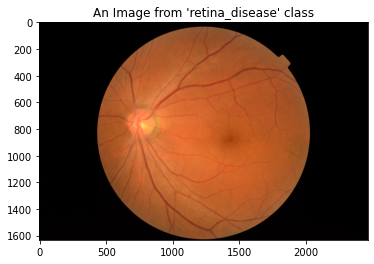

In [ ]:
retina_disease_img=cv2.imread(os.path.join(dir,'retina_disease','Retina_067.png'))
print(retina_disease_img.shape)
plt.title("An Image from 'retina_disease' class")
plt.imshow(cv2.cvtColor(retina_disease_img,cv2.COLOR_BGR2RGB))

In [ ]:
#below code actually builds the data pipline function on own  by keras
#it will build labels, classes and bunch of preprocessing  work of imgs in the dataset
#and also resizes the img's as well.

data=tf.keras.utils.image_dataset_from_directory(dir)
data

Found 601 files belonging to 4 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# data we have declared above is actually a generator, we can't grab on data easily
# to get the img's easily convert it into iterator by using function of '.as_numpy_iterator()'
# and it allows us to use the data pipelines.
data_iterator = data.as_numpy_iterator()
data_iterator

In [ ]:
# to get the batches we can use the 'next()' method.

batch = data_iterator.next()

In [ ]:
#img's represented as numpy arrays
batch[0].shape   #batch_size=32 here

(32, 256, 256, 3)

In [ ]:
print(f'the shape of batch 1 is {batch[1].shape}')
print(batch[1])

the shape of batch 1 is (32,)
[2 3 0 0 1 3 0 2 2 1 2 1 2 1 1 0 1 2 2 2 3 3 2 3 0 2 2 2 3 2 2 2]


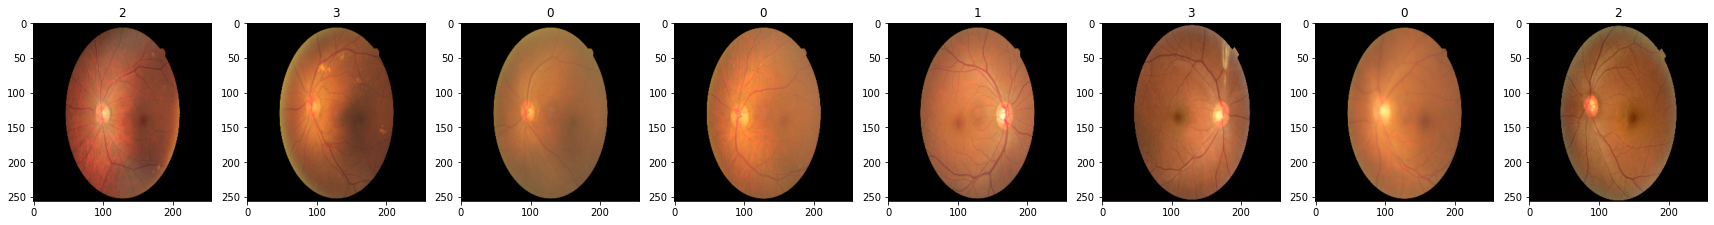

In [ ]:
fig,ax=plt.subplots(ncols=8,figsize=(30,30))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#class 0 ---> catract
#class 1 ---> glaucoma
#class 2 ---> normal
#class 3 ---> retina_disease

In [ ]:
# maximum and minimum values of the image_size

print(f" The minimum value of the  {batch[0].min()}")
print(f" The minimum value of the  {batch[0].max()}")    

 The minimum value of the  0.0
 The minimum value of the  255.0


# **DATA PREPROCESSING**

In [ ]:
# In deep learning  models ideally we need the values to be smallest as possible 
# inorder to optimize a ton faster in exection speed.
# for scaling purposes we need to divide the maximum value of the 255 of the each values 
# it will end up the  values between 0 and 1

In [ ]:
# But we are using data pipelines here. so, we need to scale the data inside the pipline using  anonymos function, ie lambada function
# map() --> allows us to make a particular transformation as our data has been preprocess through the data pipeline
# Here batch is our input

data=data.map(lambda x,y : (x/255, y))   # x ---> Images      #y ---> Labels

In [ ]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
print(batch[1])

[2 3 3 2 2 3 0 3 1 2 2 2 1 2 2 1 3 2 2 2 2 3 3 2 0 0 2 2 2 3 2 3]


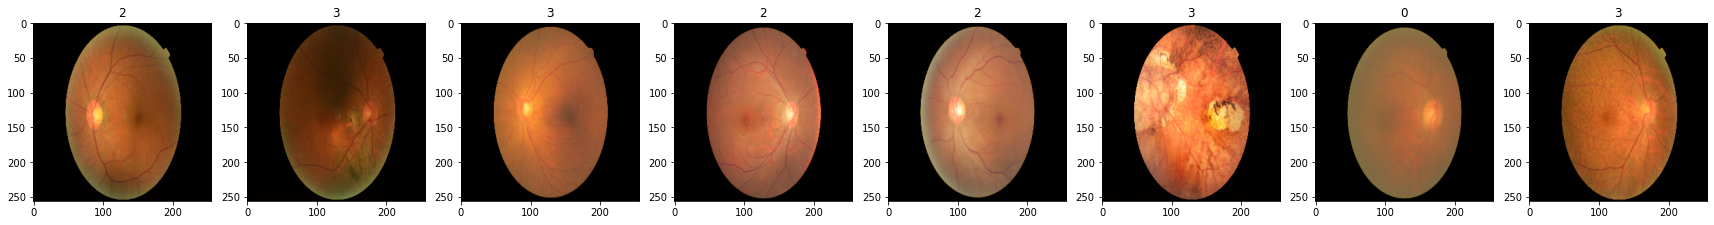

In [ ]:
fig,ax=plt.subplots(ncols=8,figsize=(30,30))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

**Split Data**

In [ ]:
print(f"no of data batches {len(data)}")

no of data batches 19


In [ ]:
# Traing set will be 70% of our data size
# Validation set will be 20% of our data size
# Testing set will be 10% of our data size

train_size = int(len(data)*0.7)    # it will train our dl model
val_size = int(len(data)*0.2)+1    #it evaluates our model while training - it will find how truely our dl model works
test_size = int(len(data)*0.1)+1   # only used at the final stage 

In [ ]:
print(f" Total of Training set total is {train_size} batches")
print(f" Total of Validation set total is {val_size} batches")
print(f" Total of Testing set total is {test_size} batches")
print(f" Total of Training, Validation and Testing set is {train_size+val_size+test_size} batches")

 Total of Training set total is 13 batches
 Total of Validation set total is 4 batches
 Total of Testing set total is 2 batches
 Total of Training, Validation and Testing set is 19 batches


In [ ]:
# take defines how many batches we gonna take to train our model
# skip  will let off the train_size batches(13) but it intakes the validation batches(4)
# it will skips both the train_size batches(13) and validation batches(4) but it takes testing batches(2)
# Our data is already shuffled.

train= data.take(train_size)  
val= data.skip(train_size).take(val_size) 
test= data.skip(train_size+val_size).take(test_size) 

In [ ]:
print(f"Train batch size is {len(train)}, Validate batch size is {len(val)} and Test batch size is {len(test)}")

Train batch size is 13, Validate batch size is 4 and Test batch size is 2


**BUILDING DEEP LEARNING MODEL** 

In [ ]:
#Conv2D is 2D convolutional layer (eg, spatial convolutional over images)
#Maxpooling2D is a condensing layer for the img's
#Dense is a fully connected through layer using through keras
#Faltten layers are convolutional layers has channels --> actually reduces back into the format where dense layer able to take
#Dropout is for doing regularization purposes

In [ ]:
model = Sequential()

In [ ]:
#building layers of neural network
#16 filters ,#(3,3)- pixel size, #1- stride(which moves 1 pixel at a time)
#relu- taking output  the above convolutional layer and pass it through a function
#ie any output previously below is converted into 0 and preserves only positive values

model.add(Conv2D(16, (3, 3), 1, activation = 'relu',input_shape=(256,256,3)))  
model.add(MaxPooling2D())     #it takes the maximum value after relu activation and return back  that value


model.add(Conv2D(32,(3,3),1, activation= 'relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16,(3,3),1,activation= "relu"))                                              
model.add(MaxPooling2D())


model.add(Flatten())  #  flattening our data  ie condensing our rows and width


model.add(Dense(256,activation= "relu"))    # last two layers will be the dense layers  ie, fully connected layers
model.add(Dense(1,activation= "softmax"))   # it yeilds  either 0 or 1  as outputs which is a single dense layer 


In [ ]:
model.compile('rmsprop', loss ='CategoricalCrossentropy',metrics= ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 16)      

**TRAIN**

In [ ]:
#creating a log directory
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)